In [1]:
#%matplotlib qt

In [1]:
import networkx as nx
import xml.etree.ElementTree as ET
from pylab import *

In [ ]:
tree = ET.parse('../map')
root = tree.getroot()

$X = $ contains the x coordinates of all nodes  
$Y = $ contains the y coordinates of all nodes  
$d = $ dict which maps the node $id$ to the index of their value in X and Y  
$paths =$ contains all the $ways$ (paths) mentioned in osm referred to nodes' $id$s  
$G $ = graph which contains the nodes connected and distance from each node referred to $id$s

In [9]:
R = 6378000
X = []
Y = []
G = {}
i = 0
d = {}
paths = []
for child in root:
    #if(child.tag == 'node'):
    if(child.tag == 'node'):
        d[child.attrib['id']] = i
        lat = float(child.attrib['lat'])*pi/180
        lon = float(child.attrib['lon'])*pi/180
        x = R*cos(lat)*cos(lon)
        y = R*cos(lat)*sin(lon)
        X.append(x)
        Y.append(y)
        i = i+1
    if(child.tag == 'way'):
        path = []
        l = 0
        for nd in child:
            if(nd.tag == 'nd'):
                path.append(nd.attrib['ref'])
                l = l+1
        paths.append(path)
        if(l <= 1):
            continue
        for k in range(l-1):
            x1 = X[d[path[k]]]
            y1 = Y[d[path[k]]]
            x2 = X[d[path[k+1]]]
            y2 = Y[d[path[k+1]]]
            if(path[k] not in G):
                G[path[k]] = []
            if(path[k+1] not in G):
                G[path[k+1]] = []
            dst = sqrt((x2-x1)**2 + (y2-y1)**2)
            G[path[k]].append([path[k+1],dst])
            G[path[k+1]].append([path[k],dst])
print('Created the graph for the map in G')

Created the graph for the map in G


### Scatter plot of the given nodes

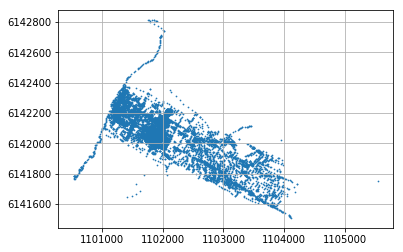

In [5]:
scatter(X,Y,s=0.5)
grid()
show()

### The graph variable G

In [6]:
G

{'368994818': [['600501270', 66.93745522403897],
  ['1054177181', 26.56700044700306],
  ['1054175806', 89.2148327822456]],
 '600501270': [['368994818', 66.93745522403897],
  ['620386556', 86.95301027227623],
  ['1054175914', 27.940770887568387],
  ['600501272', 48.168055428268]],
 '620386556': [['600501270', 86.95301027227623],
  ['620393848', 68.82084895592962],
  ['1054177064', 29.192360819447675],
  ['620386557', 54.50246260136078]],
 '620393848': [['620386556', 68.82084895592962],
  ['600501273', 51.83522587564708],
  ['1054175999', 53.9060131954346],
  ['1054176123', 29.96778038586587]],
 '600501273': [['620393848', 51.83522587564708],
  ['1054175876', 10.614227530724536],
  ['885542246', 49.601230326929695]],
 '1054175876': [['600501273', 10.614227530724536],
  ['600501265', 75.00513042520274],
  ['1054175751', 28.0374611066113]],
 '600501265': [['1054175876', 75.00513042520274],
  ['600491697', 19.808773436260523],
  ['5283855198', 1.2337120699995612],
  ['6302723106', 5.2564836

### This block can be used to view the shape of any path present in $paths$

['368994818', '600501270', '620386556', '620393848', '600501273', '1054175876', '600501265', '600491697']


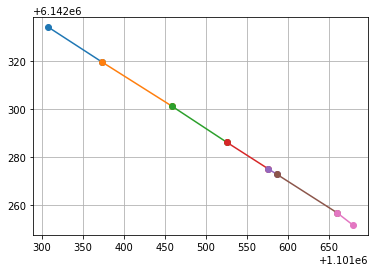

['415737365', '705126681', '415737366', '3632684502', '415737367']


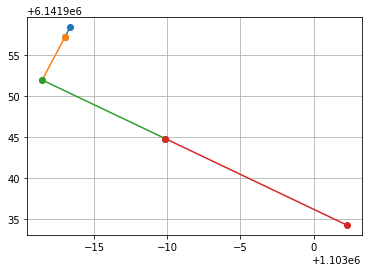

['415737384', '3632684346', '3632684344', '415737385']


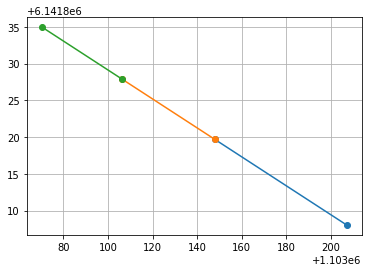

['5470790463', '415737391', '5300880729', '3632684363', '3632684353', '415737390', '3632684331', '3632684588', '415737394', '3632684574']


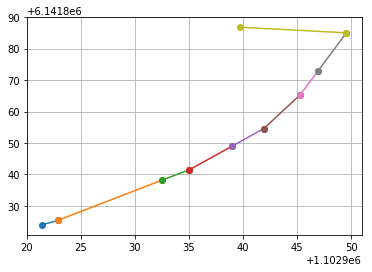

['600491269', '3406634975', '1336784282', '3637757360', '600491270', '1054175778', '2022611659', '600501295', '2295914769', '600501294', '1057079363', '1054175844', '885536506', '3414459928', '2295475032', '3639395531', '600491271']


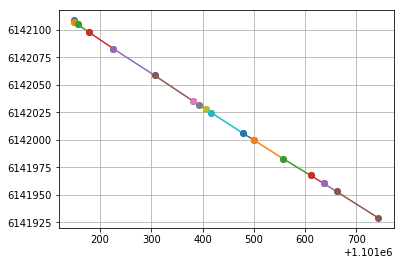

['600491271', '1054177089', '600491587', '2424337792', '3639395525', '1054175925', '1054176621', '600501293', '2424337790', '1054175965', '2424337789', '1054177073', '1054176755', '1054074786', '1054074809', '5470790438', '600491589']


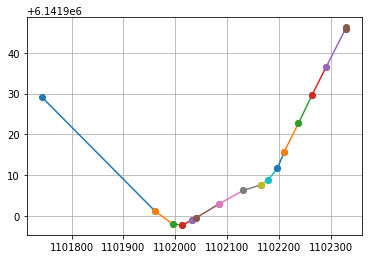

['600501272', '620386557', '1054175999', '885542246', '3639381056', '705126849', '600501263', '1054176244']


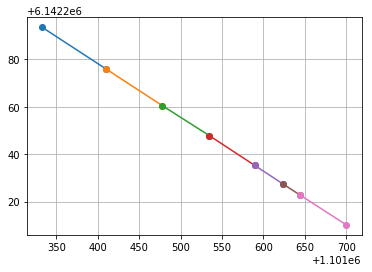

['600501273', '885542246', '4680737497', '4680737496', '1054176749', '620387071', '600491794', '621773571', '620387297', '2295947645']


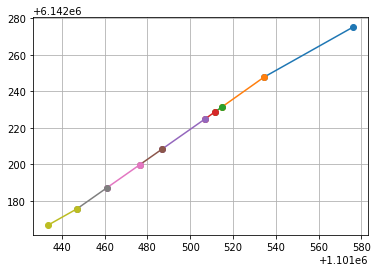

['600501265', '5283855198', '5283855199', '1054175825', '1054176386', '2295934989', '5294934512', '5294934513', '600501260']


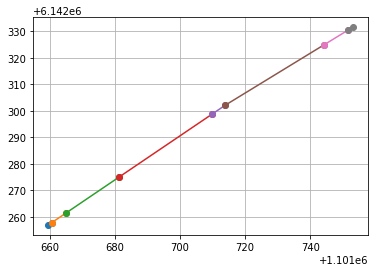

['600501278', '5482728860', '321432685', '600501285', '1054177208', '1054176971', '1054175872', '1054176638', '1054176720', '3414662223', '600491269']


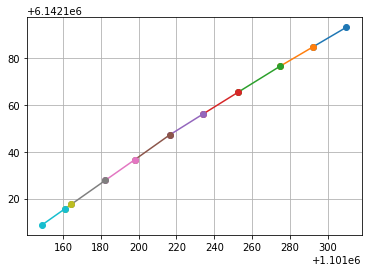

['600501274', '1054176027', '600501276']


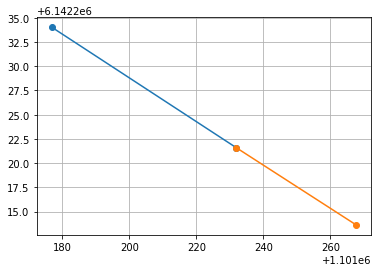

['1054175836', '1054176741', '1054177041', '1054176116', '5474505094', '5673078630', '5263178431', '1054175898', '1054175684', '1054074809']


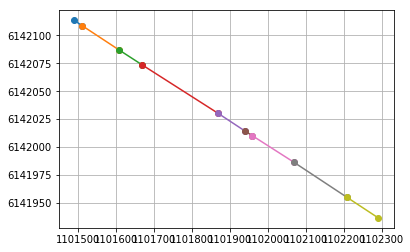

['600501288', '1054176168']


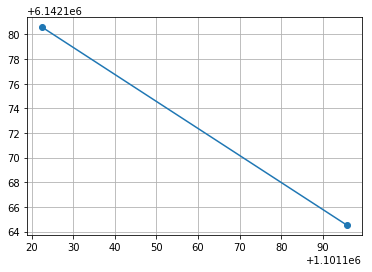

['415737329', '620387244', '620387299', '321432685']


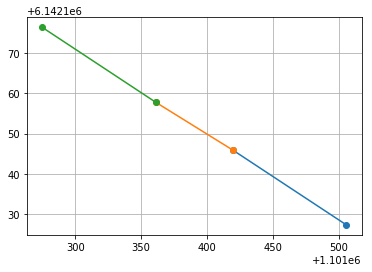

['1054176749', '1054175661', '620386759', '620386760']


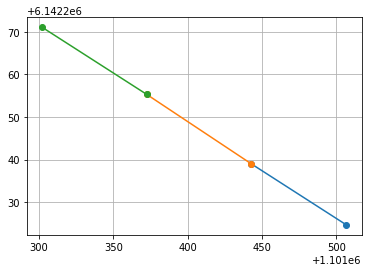

['3401280364', '620386980', '620389153', '2295926758', '3335857250', '620389154', '3335857251', '2295926765', '620386975', '620386976', '2295926764', '3339438638', '3531388810', '2295926761', '1057079302', '2295926760', '3401280362', '620386978', '2295926763', '3401280363', '620386979', '2295926762', '3401280364']


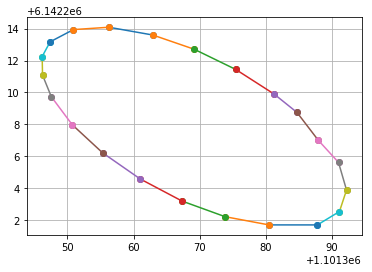

['620386979', '3339438631', '3335857249', '3396414771']


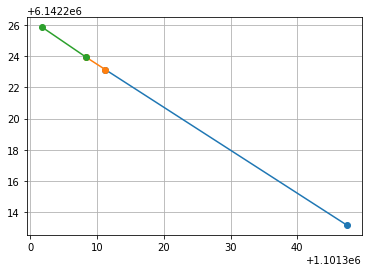

['620386976', '3335857264', '3396414775']


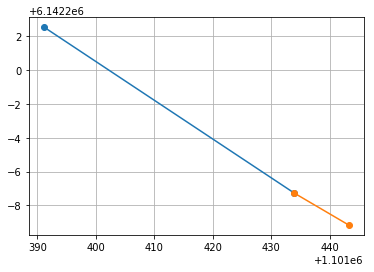

['885542786', '1054175808', '885543521', '1054074757', '620387055', '1054177204', '1054177048', '620387056']


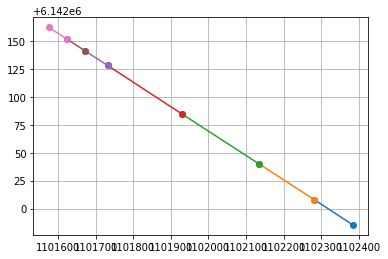

['620388963', '620395040', '3396414226', '620392719', '620386758', '1054177105', '620392721', '620387071']


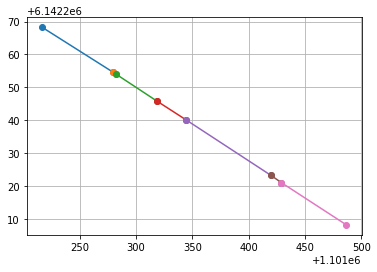

In [8]:
for path in paths[:20]:
    l = len(path)
    for k in range(l-1):
        x1 = X[d[path[k]]]
        y1 = Y[d[path[k]]]
        x2 = X[d[path[k+1]]]
        y2 = Y[d[path[k+1]]]
        plot([x1,x2],[y1,y2],'-o')
    grid()
    print(path)
    show()